<a href="https://colab.research.google.com/github/prashant9907/Handwritten-digit-image-classification/blob/main/Handwritten_digits_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load dataset
import tensorflow as tf
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.mnist.load_data()
print("the Shape of x training data: ",x_train.shape)
print("The Shape of y training  data:  ",y_train.shape)
print("The Shape of x testing data:  ",x_test.shape)
print("The Shape of y testing  data:  ",y_test.shape)

# reshape dataset to have a single channel
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0], 28,28,1))
print(x_train.shape, x_test.shape)

# one hot encode target values
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


the Shape of x training data:  (60000, 28, 28)
The Shape of y training  data:   (60000,)
The Shape of x testing data:   (10000, 28, 28)
The Shape of y testing  data:   (10000,)
(60000, 28, 28, 1) (10000, 28, 28, 1)


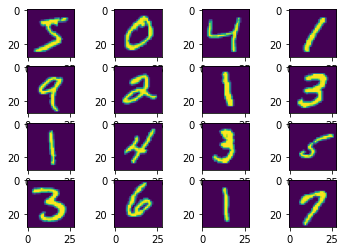

In [ ]:
 # plotting the first nine images in the train set of MNIST
import matplotlib.pyplot as plt
fig, axs = plt.subplots(4,4)
cnt =0
for i in range(4):
  for j in range(4):
    axs[i,j].imshow(x_train[cnt])
    cnt+=1

In [ ]:
# Normalize the pixel values
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

In [ ]:
# define cnn model
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD


INPUT_SHAPE = (28,28,1)
inp = keras.layers.Input(shape = INPUT_SHAPE)

conv1 = keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu', padding = 'same')(inp)
pool1 = keras.layers.MaxPooling2D(pool_size = (2,2))(conv1)
norm1 = keras.layers.BatchNormalization(axis= -1)(pool1)
drop1 = keras.layers.Dropout(rate = 0.2)(norm1)

conv2 = keras.layers.Conv2D(32, kernel_size = (3,3), activation='relu', padding = 'same')(drop1)
pool2 = keras.layers.MaxPooling2D(pool_size = (2,2))(conv2)
norm2 = keras.layers.BatchNormalization(axis= -1)(pool2)
drop2 = keras.layers.Dropout(rate = 0.2)(norm2)

flat = keras.layers.Flatten()(drop2)

hidden1 = keras.layers.Dense(512, activation='relu')(flat)
norm3 = keras.layers.BatchNormalization(axis=-1)(hidden1)
drop3 = keras.layers.Dropout(rate=0.2)(norm3)

hidden2 = keras.layers.Dense(256, activation='relu')(drop3)
norm4 = keras.layers.BatchNormalization(axis=-1)(hidden2)
drop4 = keras.layers.Dropout(rate=0.2)(norm4)

out = keras.layers.Dense(10, activation = 'sigmoid')(drop4)

model = keras.Model(inputs = inp, outputs = out)

model.summary()
# compiling the model

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size = 64, verbose = 1, epochs = 25, validation_split = 0.1, shuffle = False)



Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248  

In [ ]:
#Evaluation of model

loss, acc = model.evaluate(x_test,y_test,verbose=1)
print([loss*100,acc*100])

313/313 [==============================] - 3s 9ms/step - loss: 0.0392 - accuracy: 0.9902
[3.921639546751976, 99.01999831199646]


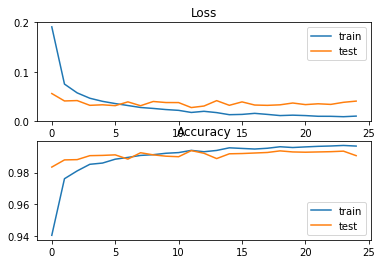

In [ ]:

# plot loss during training
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [ ]:
model.save('mnist_model.h5')